# Paramter tampering Classifier

This notebook trains a Decision tree based classifier for paramter tampering detection. Only feature we use is the length of the parameter.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_json('../Dataset/pt_dataset.json', 'records')

In [3]:
df

,length,label
0,78,valid
1,40,valid
2,43,valid
3,56,valid
4,21,valid
...,...,...
995,494,parameter-tampering
996,342,parameter-tampering
997,282,parameter-tampering
998,423,parameter-tampering


In [4]:
counts = df['label'].value_counts()

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


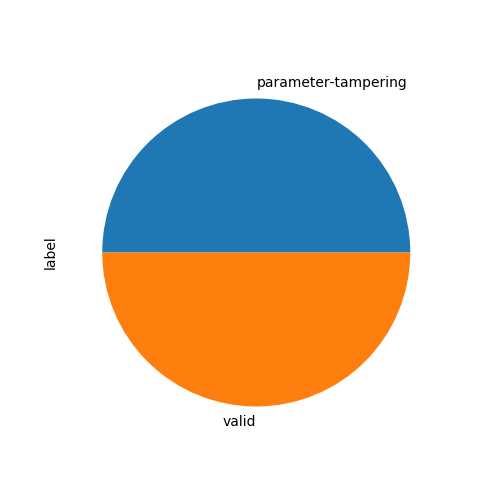

In [6]:
counts.plot.pie(figsize=(5, 5))

In [7]:
X = df['length'].to_numpy().astype(str)
y = df['label'].to_numpy().astype(str)

In [8]:
print(len(X))
print(len(y))

1000
1000


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf = DecisionTreeClassifier()

In [11]:
cross_val_score(clf, X.reshape(-1, 1), y, cv=10)

array([0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [12]:
clf.fit(X.reshape(-1, 1), y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
from sklearn.externals import joblib

joblib.dump(clf, 'pt_predictor.joblib')

/home/vladan/anaconda3/envs/srs/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['pt_predictor.joblib']